In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [10]:
data = pd.read_csv('sales_data_sample.csv',encoding='ISO-8859-1')

In [11]:
data.head

<bound method NDFrame.head of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 

In [13]:
features= data[['SALES','QUANTITYORDERED','PRICEEACH']]

In [14]:
scaler = StandardScaler()
scaled_features=scaler.fit_transform(features)

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

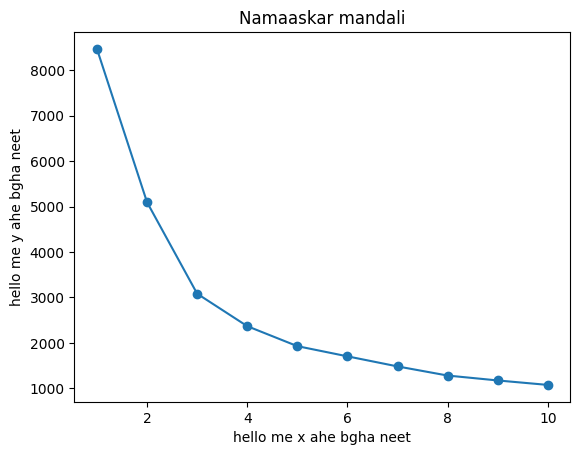

In [27]:
plt.figure()
plt.plot(range(1,11),wcss,marker='o')
plt.title("Namaaskar mandali")
plt.xlabel("hello me x ahe bgha neet")
plt.ylabel("hello me y ahe bgha neet")
plt.show()

In [35]:
def optimal_k_elbow(wcss):
    x1,y1=1,wcss[0]
    x2,y2=10,wcss[-1]
    distances=[]
    for i in range(10):
        x0=i+1
        y0=wcss[i]
        numerator=abs((y2-y1)*x0-(x2-x1)*y0+x2*y1-y2*x1)
        denominator=np.sqrt((y2-y1)**2+(x2-x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances))+1
optimal_k=optimal_k_elbow(wcss)


kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans_labels=kmeans.fit_predict(scaled_features)
print(f'Number of clusters:{optimal_k}')



Number of clusters:3


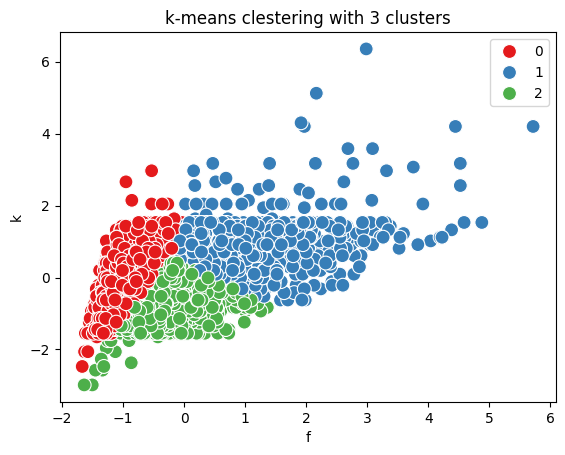

In [37]:
plt.figure()
sns.scatterplot(x=scaled_features[:,0],y=scaled_features[:,1],hue=kmeans_labels,palette='Set1',s=100)
plt.title(f'k-means clestering with {optimal_k} clusters')
plt.xlabel('f')
plt.ylabel('k')
plt.show()

In [38]:
linked =linkage(scaled_features,method='ward')

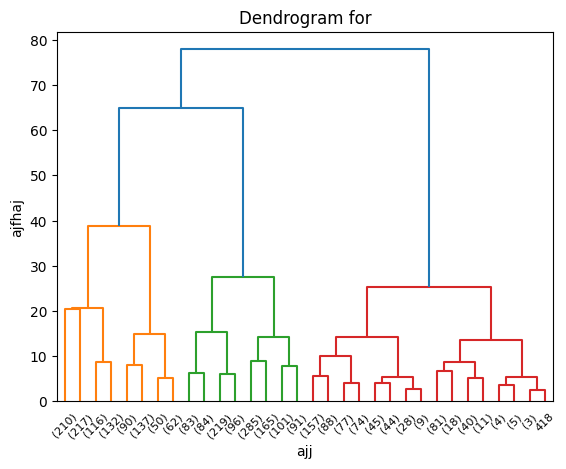

In [40]:
plt.figure
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True,truncate_mode='level',p=4)
plt.title('Dendrogram for')
plt.xlabel('ajj')
plt.ylabel('ajfhaj')
plt.show()

In [44]:
def get_optimal_clusters_from_dendrogram(linked,threshold=0.7):
    dendrogram_data=dendrogram(linked,no_plot=True)
    distances=np.diff(dendrogram_data['dcoord'],axis=1).ravel()
    threshold_distance=np.percentile(distances,threshold*100)
    num_clusters=np.sum(distances > threshold_distance)+1
    return num_clusters
optimal_hc=get_optimal_clusters_from_dendrogram(linked)

In [45]:
hc=AgglomerativeClustering(n_clusters=optimal_hc,affinity='euclidean',linkage='ward')
hierarchical_labels=hc.fit_predict(scaled_features)
print(f'Number: {optimal_hc}')

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'